# 파이썬과 Pandas를 사용한 데이터 처리

## [도전] 넷플릭스 주가 데이터 분석

A. 데이터 전처리 – 데이터 읽어오기



B. 데이터 전처리 – 2021년 이후의 종가 데이터 출력하기



C. 데이터 분석 – 2021년 이후 최고, 최저가 출력하기



D. 데이터 분석 – 2021년 이후 월 별 평균 종가 출력하기



E. 데이터 시각화 – 2022년 1월 이후 월 별 최고, 최저, 종가 시각화


### A. 데이터 전처리 - 데이터 읽어오기

In [2]:
## problem A
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("NFLX.csv", encoding='cp949', usecols=range(0, 5))
print(data)

            Date        Open        High         Low       Close
0     2018-02-05  262.000000  267.899994  250.029999  254.259995
1     2018-02-06  247.699997  266.700012  245.000000  265.720001
2     2018-02-07  266.579987  272.450012  264.329987  264.559998
3     2018-02-08  267.079987  267.619995  250.000000  250.100006
4     2018-02-09  253.850006  255.800003  236.110001  249.470001
...          ...         ...         ...         ...         ...
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013

[1009 rows x 5 columns]


### B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

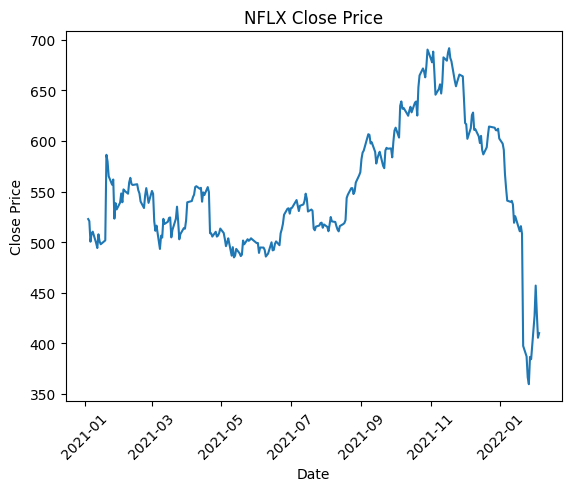

In [3]:
## problem B

data['Date'] = pd.to_datetime(data['Date'])

data_after_2021 = data[data['Date'] > "2021-01-01"]

plt.plot(data_after_2021['Date'], data_after_2021['Close'])

plt.title("NFLX Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()


### C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [4]:
## problem C
max_price = data_after_2021['Close'].max()
min_price = data_after_2021['Close'].min()
print("최고 종가:", max_price)
print("최저 종가:", min_price)



최고 종가: 691.690002
최저 종가: 359.700012


### D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_6504\2651477804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2021['Date_m'] = data_after_2021['Date'].dt.strftime("%Y-%m")


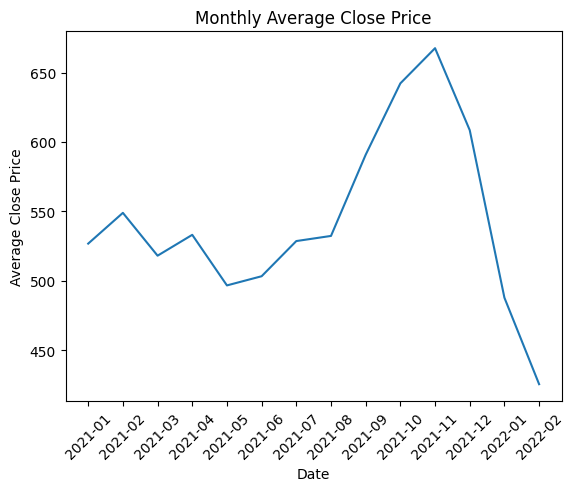

In [5]:
## problem D
data_after_2021['Date_m'] = data_after_2021['Date'].dt.strftime("%Y-%m")


mean_per_month = data_after_2021.groupby('Date_m')['Close'].mean()

plt.plot(mean_per_month)
plt.title("Monthly Average Close Price")
plt.xlabel("Date")
plt.ylabel("Average Close Price")
plt.xticks(rotation=45)
plt.show()


### E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기

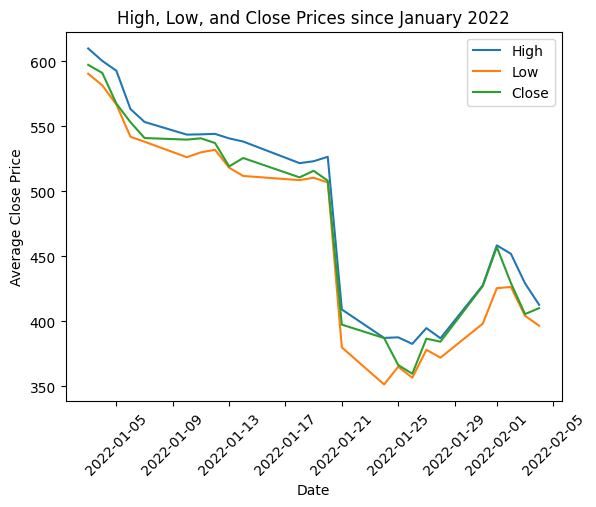

In [6]:
## problem E

data_after_2022 = data_after_2021[data_after_2021['Date'] > "2022-01-01"]

plt.plot(data_after_2022['Date'], data_after_2022['High'], label='High')
plt.plot(data_after_2022['Date'], data_after_2022['Low'], label='Low')
plt.plot(data_after_2022['Date'], data_after_2022['Close'], label='Close')

plt.title("High, Low, and Close Prices since January 2022")
plt.xlabel("Date")
plt.ylabel("Average Close Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()
